<a href="https://colab.research.google.com/github/zaeyonz/Fruits_Classification/blob/main/Fruits_Classification(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***차원***
- 지금까지 데이터가 가진 속성을 **특성**이라고 부름 --> 과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음
- 머신러닝에선 이런 특성을 ***차원*** 이라고 부름 ---> 10000개의 특성은 10000개의 차원임
- ***이 차원을 줄일수 있다면 저장 공간을 크게 절약할 수 있음***


# ***차원 축소 ***
- 특성이 많으면 선형 모델의 성능이 높아지고 train data에 쉽게 과대적합됨
- ***차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법임***
- 또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음
- 대표적인 차원 축소 알고리즘인 ***주성분 분석, PCA (principal component analysis)*** 을 알아볼 예정임

# ***PCA (주성분 분석)***
- PCA는 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있음
- 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있음
- ***분산이 가장 큰 방향을 찾고 시작점을 원점으로 옮긴 벡터를 주성분***이라함
---
- 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음
- ***하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음***
- ***주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듦!!!***

참고 - (https://velog.io/@swan9405/PCA)

# ***PCA 클래스***


In [16]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-08-06 05:50:12--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-08-06 05:50:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-08-06 05:50:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [17]:
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분 개수를 지정

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)          # k-평균과 마찬가지로 비지도 학습이기 떄문에 fit() 메서드에 타깃값 X

PCA(n_components=50)

In [18]:
print(pca.components_.shape)

(50, 10000)


- n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원은 50
- 두번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000개임

In [19]:
# 과일 그림 출력 함수 draw_fruits() 함수 만들기

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

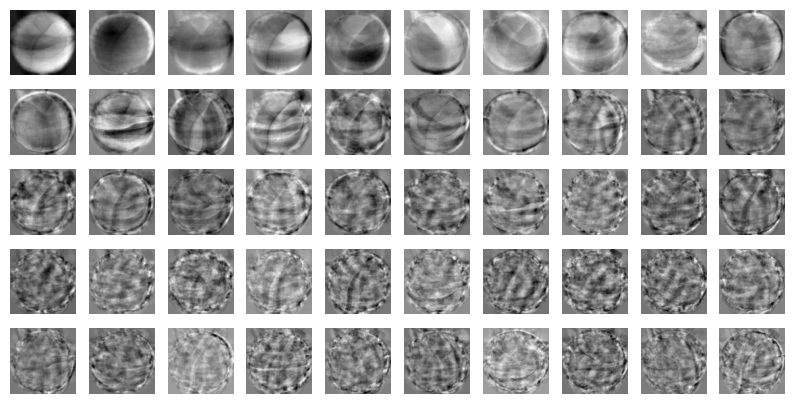

In [20]:
draw_fruits(pca.components_.reshape(-1, 100 ,100))

- data set에 있는 어떤 특징을 잡아냄
- 주성뭅능 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음
- ***마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있음***

In [21]:
print(fruits_2d.shape)

(300, 10000)


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- PCA 모델을 사용해 10000개의 특성(픽셀)을 가진 300개의 이미지를 50개의 특성으로 데이터의 크기를 줄였음
- ***fruits_2d 대신에 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있음***

# ***원본 데이터 재구성***
- PCA클래스를 이용해 특성을 줄인 후 어느정도 손실이 발생하지만 원본 데이터를 상당 부분 재구성할 수 있음
- ***PCA 클래스의 inverse_transform() 메서드 사용***

In [23]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


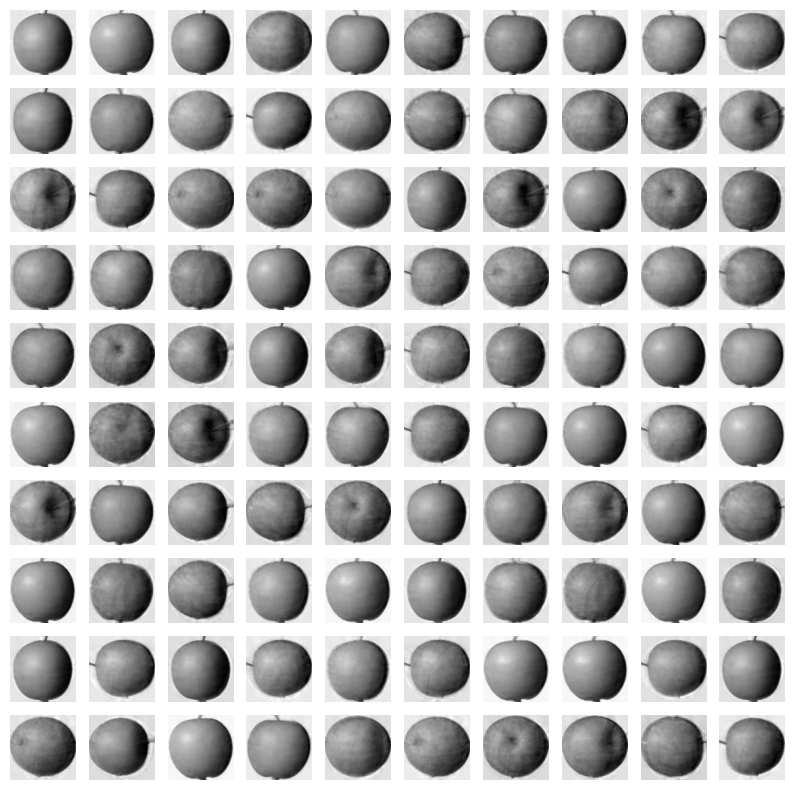

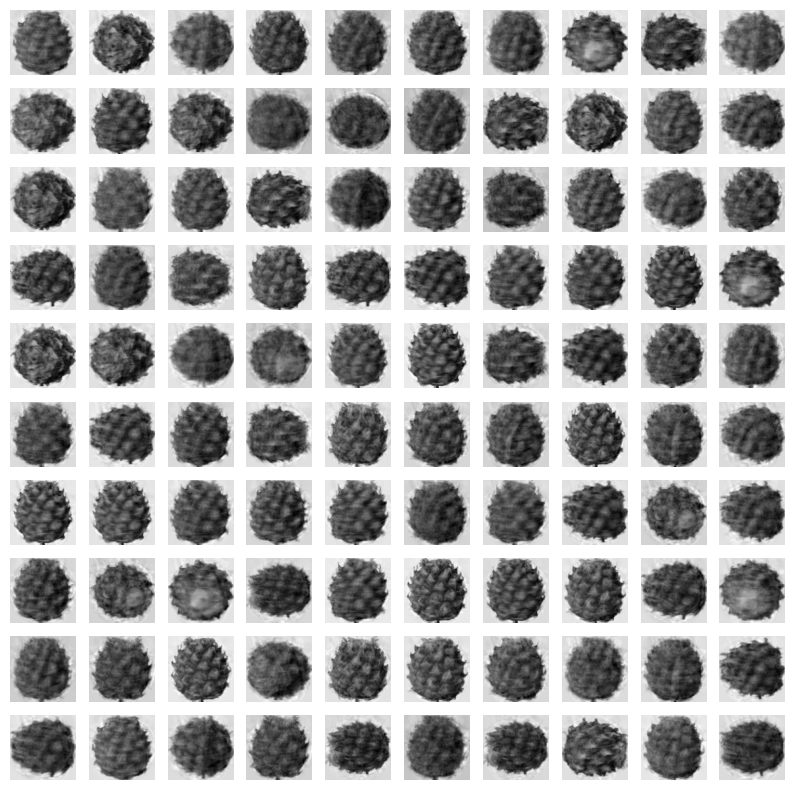

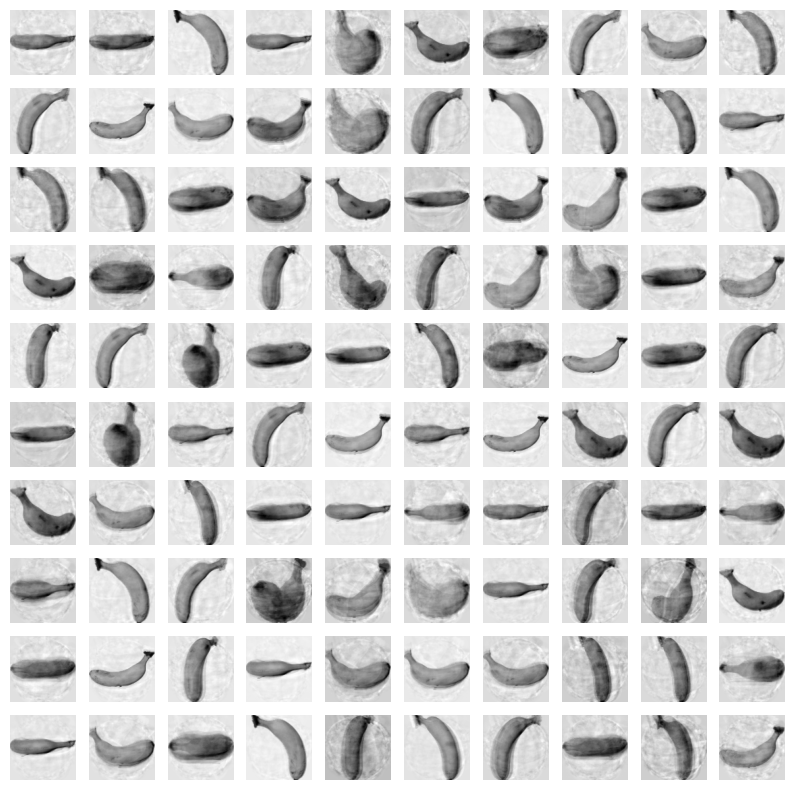

In [24]:
# 각자 이미지로 출력해보기

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

- 흐리고 번진 부분이 있지만 50개의 특성에서 10000개로 늘린 것을 감안한다면 잘 복원됨


# ***설명된 분산***
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 ***설명된 분산 (explained variance)***라고 함
- PCA 클래스의 explained_variance_ratio_ 각 주성분의 설명된 분산 비율이 기록되어 있음
- ***첫번째 주성분의 설명된 분산이 가장 큼***

In [25]:
print(np.sum(pca.explained_variance_ratio_))

0.9215932230598818


- 92%가 넘는 분산을 유지하고 있었음
- ***50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유임!!***

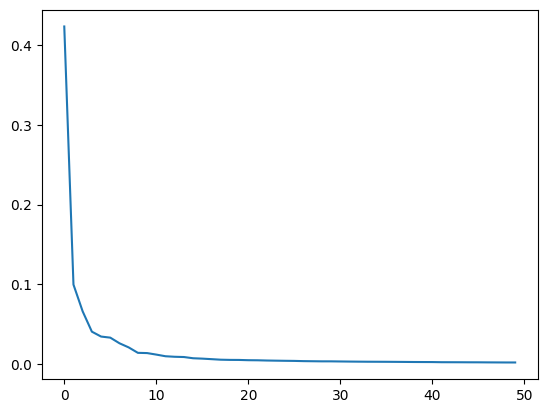

In [27]:
# 그래프로 그려보기

plt.plot(pca.explained_variance_ratio_)
plt.show()

- 그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

# ***다른 알고리즘과 함께 사용하기***
- LogisticRegression (로지스틱 회귀) --> 지도 학습
- Cross Validate (교차 검증)
- KMeans (k-평균 알고리즘)

In [29]:
# LogisticRegression()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)      # 로지스틱 회귀는 지도 학습이므로 타깃값이 필요함

In [31]:
# 교차 검증

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.644359254837036


- 교차검증의 점수는 0.997 정도로 매우 높음
- 특성이 10000개나 되기 때문에 300개의 샘플에선 금방 과대적합된 모델을 만들기 쉬움
- 교차 검증 폴드의 훈련 시간인 'fit_time'을 보면 1.64초 정도 걸림

In [32]:
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.037084007263183595


 - ***정확도 100%로 증가, 훈련 시간 0.03초로 20배 이상 감소***
 - PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음


In [36]:
pca = PCA(n_components=0.5)     # n_components_ 매개변수에 주성분 개수를 지정할 뿐 아니라 원하는 설명된 분산의 비율을 입력할 수도 있음
pca.fit(fruits_2d)

print(pca.n_components_)

2


- ***단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음***

In [38]:
# 위 모델로 원본 데이터를 변환

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [39]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.033318185806274415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

- ***2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성함***

In [40]:
# k-평균 알고리즘으로 클러스터 찾기

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 일전에 원본 데이터를 사용했을 때와 거의 비슷함


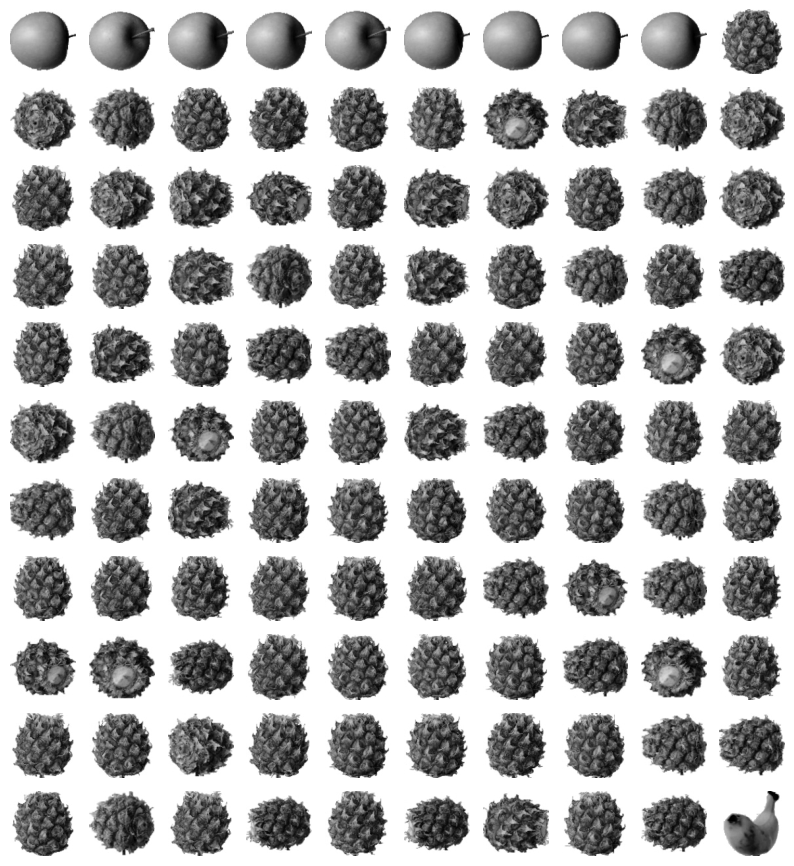



0


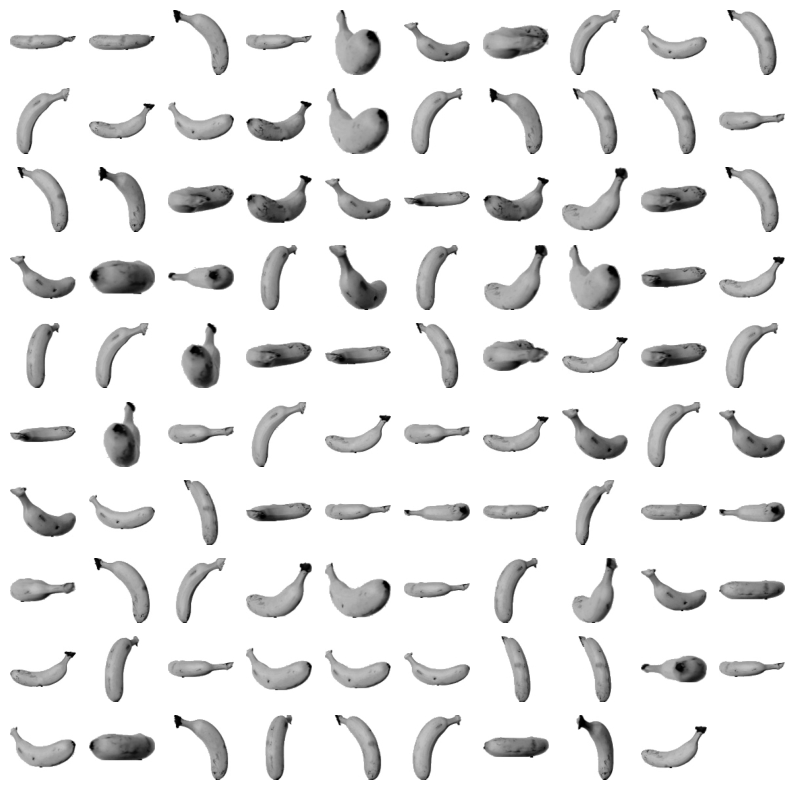



1


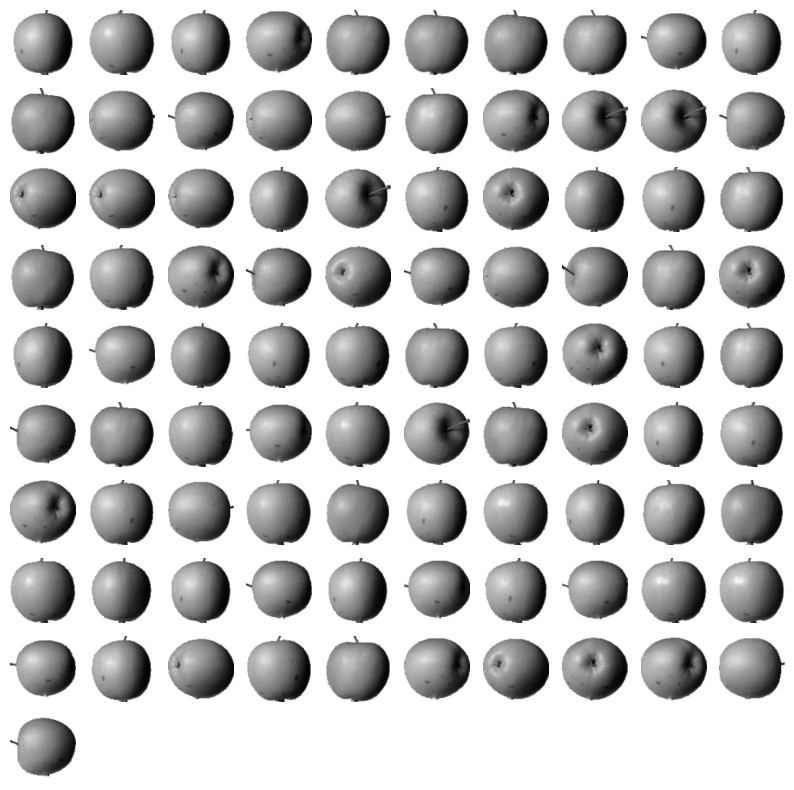



2


In [63]:
# 이미지 출력

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')
    print(label)

- 일전과 비슷하게 파인애플은 사과와 조금 혼돈되는 면이 보임


- ***train data의 차원을 줄이면 얻을 수 있은 또 하나의 장점은 시각화임***
- 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬워짐

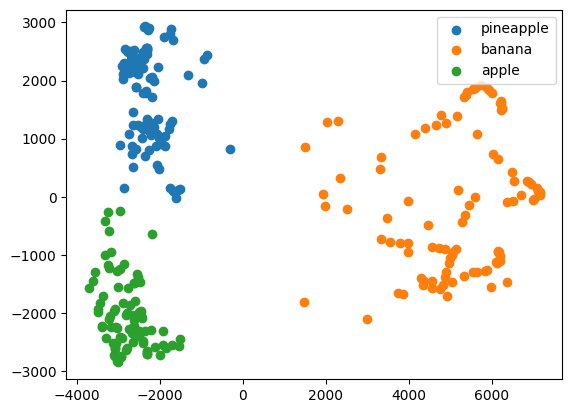

In [68]:
# km.labels_ 를 사용해 클러스터별로 나누어 산점도를 그림

for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()